# Random Forest Regression of the defence of NFL teams through the 2018-21 seasons 


All modules and libraries imported. csv containing raw data from ProFootballReference.com is also imported and read by the pandas read function. This is defined
as df.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from scipy.stats import rankdata
import seaborn as sns
df = pd.read_csv (r'C:\Users\Rob\Documents\2021stats.csv')
print (df)

                        Tm  Att   Yds   1D   YBC  YBC/Att   YAC  YAC/Att  \
0      Arizona Cardinals21  496  2076  127  1286      2.6   790      1.6   
1        Atlanta Falcons21  393  1451   75   811      2.1   640      1.6   
2       Baltimore Ravens21  517  2479  159  1579      3.1   900      1.7   
3          Buffalo Bills21  461  2209  134  1208      2.6  1001      2.2   
4      Carolina Panthers21  455  1842  117  1036      2.3   806      1.8   
..                     ...  ...   ...  ...   ...      ...   ...      ...   
91   San Francisco 49ers19  498  2305  110  1472      3.0   833      1.7   
92      Seattle Seahawks19  481  2200  121  1125      2.3  1075      2.2   
93  Tampa Bay Buccaneers19  409  1521   81   746      1.8   775      1.9   
94      Tennessee Titans19  445  2223  104   940      2.1  1283      2.9   
95   Washington Redskins19  356  1583   74   680      1.9   903      2.5   

    BrkTkl  Att/Br  ...  Ydsp   IAY  IAY/PA   CAY  CAY/Cmp  CAY/PA  YACp  \
0       28 

### Bar Chart

Display the teams and a variable 

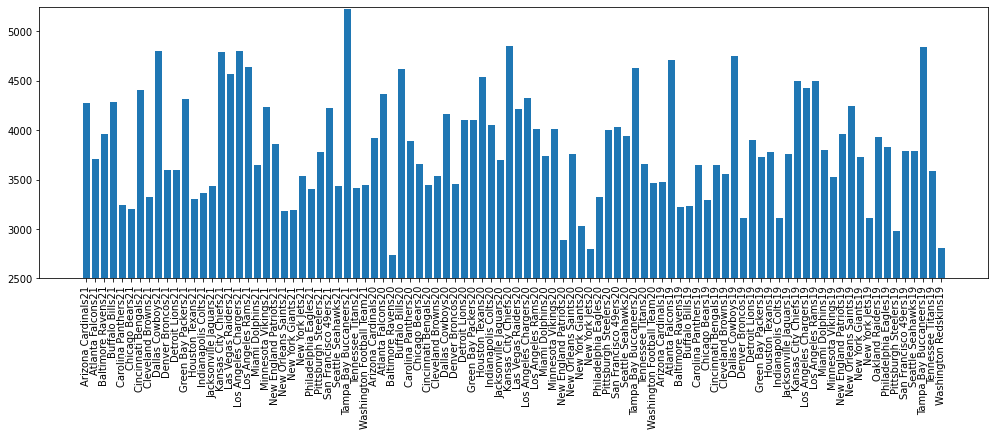

In [5]:
plt.figure(figsize=(17,5))
plt.bar(df['Tm'], df['Ydsp'])
plt.xticks(rotation = 90)
plt.ylim(2500, 5250)
plt.show()

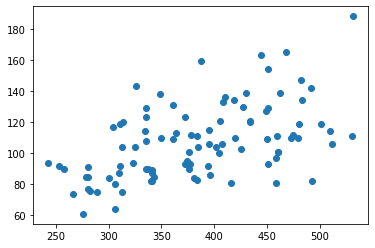

In [6]:
plt.scatter(df['PF'], df['1D'])

Define the columns that will be used in the models or tests

In [7]:
pf = df['PF']
pf = np.array(pf).reshape((-1,1))
d1 = df['1D']

### Linear Regression

Perform a Linear Regression 

In [8]:
model = LinearRegression()
model = LinearRegression().fit(pf, d1)

r_sq = model.score(pf, d1)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.26945079972915786
intercept: 41.16998558184153
slope: [0.17247061]


In [9]:
d1_pred = model.intercept_ + model.coef_ * pf
print(f"predicted response:\n{d1_pred}")

predicted response:
[[118.60929082]
 [ 95.15328745]
 [107.91611282]
 [124.47329167]
 [ 93.60105194]
 [ 94.80834623]
 [120.50646757]
 [101.36222952]
 [132.57941048]
 [ 98.94764094]
 [ 97.22293481]
 [118.78176144]
 [ 89.46175722]
 [118.95423205]
 [ 84.80505067]
 [123.95587983]
 [105.67399485]
 [122.92105615]
 [120.50646757]
 [ 99.98246462]
 [114.46999611]
 [120.85140879]
 [103.94928872]
 [ 85.66740374]
 [ 94.63587562]
 [117.74693776]
 [100.32740584]
 [114.81493734]
 [109.29587772]
 [129.30246883]
 [113.43517243]
 [ 98.94764094]
 [111.88293692]
 [109.46834833]
 [121.88623247]
 [127.5777627 ]
 [101.53470014]
 [105.32905362]
 [ 94.80834623]
 [111.53799569]
 [109.29587772]
 [ 96.87799358]
 [106.19140669]
 [128.9575276 ]
 [107.39870098]
 [118.95423205]
 [ 93.94599316]
 [122.74858554]
 [116.02223163]
 [107.39870098]
 [105.32905362]
 [110.84811324]
 [115.33234918]
 [ 97.39540542]
 [124.30082105]
 [ 89.46175722]
 [ 83.08034454]
 [ 98.77517033]
 [112.91776059]
 [106.01893607]
 [120.33399695]
 [12

### Redefining

Redefine the variables so that x has two lists that were the most important from the Random Forest Regression

In [10]:
x = df['1D'], df['Ydsp']
y = df['PF']
x, y = np.array(x), np.array(y)

In [11]:
x = np.vstack((df['1D'], df['Ydsp'])).T

In [12]:
x

array([[ 127, 4276],
       [  75, 3713],
       [ 159, 3961],
       [ 134, 4284],
       [ 117, 3239],
       [ 119, 3207],
       [ 101, 4403],
       [ 138, 3320],
       [ 111, 4800],
       [ 123, 3593],
       [ 104, 3598],
       [ 109, 4315],
       [  77, 3305],
       [ 154, 3361],
       [  92, 3436],
       [ 119, 4791],
       [  95, 4567],
       [ 112, 4800],
       [ 101, 4642],
       [  87, 3651],
       [ 103, 4238],
       [ 139, 3857],
       [ 113, 3186],
       [  90, 3196],
       [  87, 3541],
       [ 163, 3404],
       [  85, 3778],
       [ 130, 4221],
       [ 106, 3432],
       [ 106, 5229],
       [ 134, 3418],
       [ 129, 3441],
       [ 136, 3916],
       [  86, 4363],
       [ 165, 2739],
       [ 119, 4620],
       [ 110, 3888],
       [  93, 3655],
       [  92, 3448],
       [ 133, 3539],
       [ 115, 4161],
       [  94, 3451],
       [  93, 4104],
       [ 114, 4106],
       [  83, 4538],
       [ 129, 4053],
       [  80, 3699],
       [ 110,

### Linear Regression

Use a linear regression for the x and y variables so we can now see the correlation coefficients of the combined 

In [13]:
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.7068457568512116
intercept: -135.88423483853654
coefficients: [1.73092809 0.08727336]


Use the model to predict y based on the x variables already used

In [14]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[457.12451928 317.98135694 485.0231099  469.93920281 349.31276427
 349.98187294 423.20410558 392.73139635 475.16091034 390.59310219
 358.14183523 429.37147466 285.83568233 424.00445357 323.23241384
 488.22287484 427.13136803 476.89183843 444.06243857 333.34154574
 412.2658574  441.32811864 337.76356383 298.82495131 323.74147616
 443.33556087 340.96340625 457.51726877 347.11631369 503.94654122
 394.36047324 387.71312005 441.28446259 393.74924981 388.7606328
 473.29913031 393.83667812 344.07620773 324.27969416 403.18962168
 426.3169458  328.00337043 383.26194627 419.78598292 403.8293035
 441.12441624 325.41417036 478.14274367 441.58982251 434.05515788
 427.33518665 363.26184652 454.59366933 363.8584921  446.53548076
 285.71940824 270.83931977 351.80003565 353.67619983 390.91296246
 400.19309428 409.77843106 428.71713752 353.45819075 356.23639916
 420.92034291 470.98683177 353.63281495 324.59963192 298.46128003
 329.96696291 330.06881411 486.46286854 267.52281588 346.4

In [15]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
[457.12451928 317.98135694 485.0231099  469.93920281 349.31276427
 349.98187294 423.20410558 392.73139635 475.16091034 390.59310219
 358.14183523 429.37147466 285.83568233 424.00445357 323.23241384
 488.22287484 427.13136803 476.89183843 444.06243857 333.34154574
 412.2658574  441.32811864 337.76356383 298.82495131 323.74147616
 443.33556087 340.96340625 457.51726877 347.11631369 503.94654122
 394.36047324 387.71312005 441.28446259 393.74924981 388.7606328
 473.29913031 393.83667812 344.07620773 324.27969416 403.18962168
 426.3169458  328.00337043 383.26194627 419.78598292 403.8293035
 441.12441624 325.41417036 478.14274367 441.58982251 434.05515788
 427.33518665 363.26184652 454.59366933 363.8584921  446.53548076
 285.71940824 270.83931977 351.80003565 353.67619983 390.91296246
 400.19309428 409.77843106 428.71713752 353.45819075 356.23639916
 420.92034291 470.98683177 353.63281495 324.59963192 298.46128003
 329.96696291 330.06881411 486.46286854 267.52281588 346.4

Input all the data from the current season for the variables used to make the model above. None f these variables were averages like yards/play etc therefore, the variables had to be converted to a full season projection. this was done by dividing the data by games played by that team and multiplied by 17(the number of games in a season)

In [16]:
x_new = [153,2579],[97,5451],[82,2885],[133,2088],[90,4738],[163,3645],[85,4429],[131,3761],[106,3115],[87,3725],[96,3635],[106,3761],[99,3558],[119,3975],[92,5032],[80,4786],[96,4114],[128,4356],[121,3796],[167,2734],[102,4369],[96,2813],[153,3475],[82,3582],[130,4057],[68,4068],[157,3225],[87,4750],[114,3837],[116,3982],[72,4524],[104,3757]
x_new

([153, 2579],
 [97, 5451],
 [82, 2885],
 [133, 2088],
 [90, 4738],
 [163, 3645],
 [85, 4429],
 [131, 3761],
 [106, 3115],
 [87, 3725],
 [96, 3635],
 [106, 3761],
 [99, 3558],
 [119, 3975],
 [92, 5032],
 [80, 4786],
 [96, 4114],
 [128, 4356],
 [121, 3796],
 [167, 2734],
 [102, 4369],
 [96, 2813],
 [153, 3475],
 [82, 3582],
 [130, 4057],
 [68, 4068],
 [157, 3225],
 [87, 4750],
 [114, 3837],
 [116, 3982],
 [72, 4524],
 [104, 3757])

### Predicting current season

Use the data from the current season to predict every teams points scored over the full season 

In [17]:
y_new = model.predict(x_new)
y_new

array([354.02575813, 507.74287427, 257.83551168, 276.55597663,
       433.4004721 , 464.36844058, 397.77836346, 419.10245137,
       319.45065864, 339.79977436, 347.52352481, 375.82924906,
       345.99626038, 417.00781325, 462.52069606, 420.28031245,
       389.32746415, 465.83731616, 404.84773804, 391.78612218,
       421.96773944, 275.78482307, 432.22268849, 318.66504345,
       443.20443777, 336.84690302, 417.32806092, 429.25496814,
       396.30944914, 412.4259425 , 383.56726745, 372.01829944])

Print the predictions for each team which is in alphabetical order

In [18]:
ylist = list(y_new)
print(type(ylist))
print(ylist)
print(len(ylist))

<class 'list'>
[354.025758128841, 507.7428742662682, 257.8355116840193, 276.55597663408105, 433.4004720970019, 464.3684405774597, 397.7783634638899, 419.1024513654133, 319.4506586439897, 339.79977436144287, 347.5235248098312, 375.82924906324644, 345.9962603828671, 417.00781325374936, 462.5206960571218, 420.28031244567745, 389.327464145472, 465.8373161595213, 404.84773803692116, 391.7861221842847, 421.9677394424355, 275.7848230689193, 432.2226884936305, 318.66504345216475, 443.2044377688374, 336.8469030170672, 417.3280609164444, 429.2549681381275, 396.30944914338187, 412.4259424959642, 383.5672674460657, 372.0182994399446]
32


Create a list for all the teams in the NFL in alphabetical order

In [159]:
Teams = ('Atlanta Falcons', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Indianapolis Colts', 'Arizona Cardinals', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Miami Dolphins', 'Minnesota Vikings', 'New Orleans Saints', 'New England Patriots', 'New York Giants', 'New York Jets', 'Tennessee Titans', 'Philadelphia Eagles', 'Pittsburgh Steelers', 'Las Vegas Raiders', 'Los Angeles Rams', 'Baltimore Ravens', 'Los Angeles Chargers', 'Seattle Seahawks', 'San Francisco 49ers', 'Tampa Bay Buccaneers', 'Washington Commanders')
print(len(Teams))

32


Create a data frame for the predictions created

In [21]:
data = ylist
df1 = pd.DataFrame(data, columns=['Pred'])
  
df1

,Pred
0,354.025758
1,507.742874
2,257.835512
3,276.555977
4,433.400472
5,464.368441
6,397.778363
7,419.102451
8,319.450659
9,339.799774


In [161]:
df1['Teams'] = Teams
print(df1)

          Pred                  Teams
0   354.025758        Atlanta Falcons
1   507.742874          Buffalo Bills
2   257.835512      Carolina Panthers
3   276.555977          Chicago Bears
4   433.400472     Cincinnati Bengals
5   464.368441       Cleveland Browns
6   397.778363     Indianapolis Colts
7   419.102451      Arizona Cardinals
8   319.450659         Dallas Cowboys
9   339.799774         Denver Broncos
10  347.523525          Detroit Lions
11  375.829249      Green Bay Packers
12  345.996260         Houston Texans
13  417.007813   Jacksonville Jaguars
14  462.520696     Kansas City Chiefs
15  420.280312         Miami Dolphins
16  389.327464      Minnesota Vikings
17  465.837316     New Orleans Saints
18  404.847738   New England Patriots
19  391.786122        New York Giants
20  421.967739          New York Jets
21  275.784823       Tennessee Titans
22  432.222688    Philadelphia Eagles
23  318.665043    Pittsburgh Steelers
24  443.204438      Las Vegas Raiders
25  336.8469

Save the data frame 

In [163]:
df1.to_csv(r'C:\Users\Rob\Documents\Prediction.csv', index = False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Rob\\Documents\\Prediction.csv'